In [1]:
try:
    # --- Mount gdrive to /content/drive/My Drive/
    from google.colab import drive
    drive.mount('/content/drive')
    
except: pass

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install colormath
import numpy as np
from PIL import Image
from PIL import ImageColor
import pandas as pd
from collections import Counter,OrderedDict
from itertools import dropwhile
from colormath.color_objects import sRGBColor, LabColor,LuvColor
from colormath.color_conversions import convert_color
from colormath.color_diff import delta_e_cie2000,delta_e_cmc,delta_e_cie1976
import cv2 
import os 
import sys

In [3]:
color_to_class = {
    '#2d2c00':'stone',
    '#b87117':'granite',
    '#9fb816':'polished granite',
    '#e8e700':'diorite',
    '#ce2c15':'polished diorite',
    '#157200':'andesite',
    '#00b800':'polished andesite',
    '#5c2c44':'grass block',
    '#5aa115':'dirt',
    '#16a017':'coarse dirt',
    '#44e616':'podzol',
    '#5cd015':'cobblestone',
    '#5be700':'oak wood plank',
    '#452d15':'spruce wood plank',
    '#8b5c00':'birch wood plank',
    '#73a100':'jungle wood plank',
    '#2d165c':'acacia wood plank',
    '#a11400':'dark oak wood plank',
    '#16d000':'bedrock',
    '#a1d046':'sand',
    '#2d002b':'red sand',
    '#a12d44':'gravel',
    '#002d44':'gold ore',
    '#00b846':'iron ore',
    '#00a016':'coal ore',
    '#a1005d':'oak wood',
    '#d0015c':'spruce wood',
    '#45005b':'birch wood',
    '#73005b':'jungle wood',
    '#a2e645':'oak leaf',
    '#b8e645':'spruce leaf',
    '#00ce45':'birch leaf',
    '#15d043':'jungle leaf',
    '#5e732e':'glass',
    '#a1b846':'lapiz lazuli',
    '#e65b00':'sandstone',
    '#012c00':'chiseled sandstone',
    '#d0a000':'smooth sandstone',
    '#b7002c':'wool',
    '#894400':'brick',
    '#5e8a01':'bookshelf',
    '#73cf16':'mossy cobblestone',
    '#b7722d':'obsidian',
    '#725b17':'diamond ore',
    '#00742d':'furnace',
    '#892d16':'redstone ore',
    '#2d8a44':'ice block',
    '#005b46':'snow block',
    '#758a45':'pumpkin',
    '#d08917':'clay block',
    '#5b8a2c':'stone brick',
    '#165c44':'mossy stone brick',
    '#2d1644':'cracked stone brick',
    '#45d02d':'chiseled stone brick',
    '#cfa044':'iron bars',
    '#5dd02d':'vine',
    '#711500':'melon',
    '#740146':'mycelium',
    '#5c4444':'mycelium',
    '#ceb946':'acacia leaf',
    '#e7b844':'dark oak leaf',
    '#e8e644':'acacia wood',
    '#15005b':'dark oak wood',
    '#5dd001':'cactus',
    '#9f5169':'player',
    '#b9b715':'torch',
    '#2c2c46':'village road',
    '#8b2d45':'grass',
    '#b9005d':'oak wood',
    '#e7005c':'spruce wood',
    '#d08917':'clay block',
    '#001601':'podzol',
    '#2de700':'melon',
    '#004518':'wheat',
    '#2e1616':'wheat',
    '#170015':'wheat',
    '#592d00':'wheat',
    '#e57217':'wheat',
    '#437200':'wheat',
    '#e8165d':'wheat',
    '#171717':'wheat',
    '#16b900':'grass',
    '#e7162c':'fern',
    '#b94400':'dead bush',
    '#5d2d2d':'yellow flower',
    '#2d5b2c':'red flower',
    '#462c2b':'blue flower',
    '#2e2e2e':'purple flower',
    '#2e2e2c':'purple flower',
    '#732b2e':'white flower',
    '#725c2d':'red tulip',
    '#e6d000':'tall grass',
    '#d01715':'tall grass',
    '#445b2d':'orange tulip',
    '#885c2b':'white tulip',
    '#5a5c2b':'pink tulip',
    '#8a2c2c':'daisy',
    '#165d01':'tall fern',
    '#01a101':'tall fern',
    '#89e715':'rose bush',
    '#451700':'rose bush',
    '#b75c15':'peony',
    '#a2a017':'peony',
    '#8bb72e':'red mushroom',
    '#a2732d':'brown mushroom',
    '#7e54ba':'villager',
    '#ffffff':'spider',
    '#29c9bf':'horse',
    '#c26b3e':'sheep',
    '#afc324':'chicken',
    '#7051c9':'rabbit',
    '#00386b':'pig',
    '#263971':'wolf',
    '#9510cb':'zombie villager',
    '#fa75aa':'witch',
    '#e35fe6':'zombie',
    '#b65be7':'skeleton',
    '#5ba045':'bow',
    '#fd9cfd':'gold helmet',
    '#86d6ed':'creeper',
    '#c3bf15':'squid',
    '#2c5c44':'water',
    '#c24cac':'slime',
    '#d0a481':'mooshroom',
    '#2ce75a':'sword',
    '#b599e6':'ocelot',
    '#123650':'polar bear',
    '#000000':'lava',
    '#140000':'lava',
    '#e72c00':'lava',
    '#004600':'lava',
    '#b8b944':'lava',
    '#a20017':'cactus',
    '#2d4400':'water',
    '#450100':'water',
    '#164501':'water',
    '#2c0001':'water',
    '#facdae':'sky',
    '#608b18':'lama',
    '#23c33f':'mule',
    '#a05b16':'door',
    '#8ba216':'door',
    '#2e1500':'door',
    '#73e715':'door',
    '#5858d2':'donkey',
    '#002e2e':'fire',
    '#172c2d':'fire',
    '#b70043':'quartz',
    '#a04544':'quartz',
    '#5d0046':'glowstone',
    '#5b1643':'wool',
    '#164415':'wool',
    '#448a44':'nether brick',
    '#008945':'anvil',
    '#008a13':'wool',
    '#e7b715':'wool',
    '#2c0017':'wool',
    '#732d14':'rail',
    '#8be700':'rail',
    '#742d01':'wool',
    '#2cb714':'quartz',
    '#e7a046':'iron block',
    '#012d5c':'wool',
    '#8b002a':'stone slab',
    '#74462c':'stone slab',
    '#0abe1d':'sign',
    '#16002e':'chiseled quartz',
    '#00462e':'chiseled quartz',
    '#a11514':'door',
    '#5bb716':'torch',
    '#45b900':'wool',
    '#004443':'clay block',
    '#b8b62d':'prismarine',
    '#8a1617':'diamond block',
    '#8a155b':'sandstone',
    '#b7e600':'sandstone',
    '#17d02d':'sea lantern',
    '#2d0043':'glass',
    '#b8a12d':'glass',
    '#a1a22d':'glass',
    '#72a12d':'glass',
    '#460046':'glass',
    '#8aa12d':'glass',
    '#d0e62c':'glass',
    '#44a12e':'glass',
    '#150045':'glass',
    '#2ca12e':'glass',
    '#e6e62c':'glass',
    '#8a732f':'glass',
    '#17a22d':'glass',
    '#5ca12d':'glass',
    '#73732d':'glass',
    '#2ca146':'wool',
    '#5b7315':'rail',
    '#d11400':'rail',
    '#a2a000':'rail',
    '#73d044':'rail',
    '#897344':'clay block',
    '#157245':'clay block',
    '#ce5b46':'clay block',
    '#2d7245':'clay block',
    '#2c4444':'clay block',
    '#737244':'clay block',
    '#154545':'clay block',
    '#447244':'clay block',
    '#e72d45':'clay block',
    '#004443':'clay block',
    '#454545':'clay block',
    '#5b7244':'clay block',
    '#d02c44':'clay block',
    '#b82c46':'clay block',
    '#89b844':'lapiz lazuli block',
    '#e68b00':'door',
    '#005a00':'door',
    '#72d000':'crafting table',
    '#b7a100':'lamp',
    '#44b616':'nether brick',
    '#2dcf45':'nether wart block'
                 }


class_to_color = {v: ImageColor.getcolor(k, "RGB") for k, v in color_to_class.items()}


nums = np.arange(len(class_to_color))
rgb_to_class={ ImageColor.getcolor(k, "RGB"):v for k, v in color_to_class.items()}
normalize_colours = {ImageColor.getcolor(k, "RGB"):class_to_color[v]  for k, v in color_to_class.items()}
# print(class_to_color)
# print(normalize_colours)
print(rgb_to_class)

{(45, 44, 0): 'stone', (184, 113, 23): 'granite', (159, 184, 22): 'polished granite', (232, 231, 0): 'diorite', (206, 44, 21): 'polished diorite', (21, 114, 0): 'andesite', (0, 184, 0): 'polished andesite', (92, 44, 68): 'grass block', (90, 161, 21): 'dirt', (22, 160, 23): 'coarse dirt', (68, 230, 22): 'podzol', (92, 208, 21): 'cobblestone', (91, 231, 0): 'oak wood plank', (69, 45, 21): 'spruce wood plank', (139, 92, 0): 'birch wood plank', (115, 161, 0): 'jungle wood plank', (45, 22, 92): 'acacia wood plank', (161, 20, 0): 'dark oak wood plank', (22, 208, 0): 'bedrock', (161, 208, 70): 'sand', (45, 0, 43): 'red sand', (161, 45, 68): 'gravel', (0, 45, 68): 'gold ore', (0, 184, 70): 'iron ore', (0, 160, 22): 'coal ore', (161, 0, 93): 'oak wood', (208, 1, 92): 'spruce wood', (69, 0, 91): 'birch wood', (115, 0, 91): 'jungle wood', (162, 230, 69): 'oak leaf', (184, 230, 69): 'spruce leaf', (0, 206, 69): 'birch leaf', (21, 208, 67): 'jungle leaf', (94, 115, 46): 'glass', (161, 184, 70): 'la

In [4]:
rev_multidict = {}
for key, value in color_to_class.items():
    rev_multidict.setdefault(value, set()).add(key)
temp=[key for key, values in rev_multidict.items() if len(values) > 1]
print(temp)
# print(color_to_class[(83, 205, 0)])

['podzol', 'oak wood', 'spruce wood', 'glass', 'sandstone', 'wool', 'clay block', 'melon', 'mycelium', 'cactus', 'torch', 'grass', 'wheat', 'purple flower', 'tall grass', 'tall fern', 'rose bush', 'peony', 'water', 'lava', 'door', 'fire', 'quartz', 'nether brick', 'rail', 'stone slab', 'chiseled quartz']


In [5]:
from os import listdir, mkdir
from os.path import isfile, join, exists
import torch
MOUNT_ROOT = '/content/drive/My Drive'
MODELS_PATH = join(MOUNT_ROOT, "CopyModels")
MODELS_DIR_PATH = join(MOUNT_ROOT, "Copy of Models")

In [6]:
torch.cuda.empty_cache()
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import  Dataset,DataLoader

class MinecraftSegmentationDataset(Dataset):
    """Segmentation Dataset"""
 
    def __init__(self, root_dir, imageFolder, maskFolder, transform=None, seed=None, fraction=None, subset=None, imagecolormode='rgb', maskcolormode='grayscale'):
        """
        Args:
            root_dir (string): Directory with all the images and should have the following structure.
            root
            --Images
            -----Img 1
            -----Img N
            --Mask
            -----Mask 1
            -----Mask N
            imageFolder (string) = 'Images' : Name of the folder which contains the Images.
            maskFolder (string)  = 'Masks : Name of the folder which contains the Masks.
            transform (callable, optional): Optional transform to be applied on a sample.
            seed: Specify a seed for the train and test split
            fraction: A float value from 0 to 1 which specifies the validation split fraction
            subset: 'Train' or 'Test' to select the appropriate set.
            imagecolormode: 'rgb' or 'grayscale'
            maskcolormode: 'rgb' or 'grayscale'
        """
        self.color_dict = {'rgb': 1, 'grayscale': 0}
        assert(imagecolormode in ['rgb', 'grayscale'])
        assert(maskcolormode in ['rgb', 'grayscale'])
 
        self.imagecolorflag = self.color_dict[imagecolormode]
        self.maskcolorflag = self.color_dict[maskcolormode]
        self.root_dir = root_dir
        self.transform = transform
        if not fraction:
            self.image_names = sorted(
                glob.glob(os.path.join(self.root_dir, imageFolder, '*')))
            self.mask_names = sorted(
                glob.glob(os.path.join(self.root_dir, maskFolder, '*')))
        else:
            assert(subset in ['Train', 'Test'])
            self.fraction = fraction
            self.image_list = np.array(sorted(glob.glob(os.path.join(self.root_dir, imageFolder, '*'))))
            # print('image', self.image_list)
            self.mask_list = np.array(
                sorted(glob.glob(os.path.join(self.root_dir, maskFolder, '*'))))
            # print('mask', self.image_list)
            if seed:
                np.random.seed(seed)
            indices = np.arange(len(self.image_list))
            # np.random.shuffle(indices)
            self.image_list = self.image_list[indices]
            self.mask_list = self.mask_list[indices]
            if subset == 'Train':
                self.image_names = self.image_list[:int(
                    np.ceil(len(self.image_list)*(1-self.fraction)))]
                self.mask_names = self.mask_list[:int(
                    np.ceil(len(self.mask_list)*(1-self.fraction)))]
            else:
                self.image_names = self.image_list[int(
                    np.ceil(len(self.image_list)*(1-self.fraction))):]
                self.mask_names = self.mask_list[int(
                    np.ceil(len(self.mask_list)*(1-self.fraction))):]
 
    def __len__(self):
        return len(self.image_names)

    def __getitem__(self, idx):
        img_name = self.image_names[idx]
        msk_name = self.mask_names[idx]
        if self.imagecolorflag:
            if cv2.imread(img_name, self.imagecolorflag) is None:
                print(img_name)
            image = cv2.imread(img_name, self.imagecolorflag).transpose(2, 0, 1)
        else:
            image = cv2.imread(img_name, self.imagecolorflag)
                                  
        if self.maskcolorflag:
            mask = cv2.imread(msk_name, self.maskcolorflag).transpose(2, 0, 1)
        else:
            mask = cv2.imread(msk_name, self.maskcolorflag)
        sample = {'image': image, 'mask': mask}
 
        if self.transform:
            sample = self.transform(sample)
 
        return sample
        
class Resize(object):
    """Resize image and/or masks."""

    def __init__(self, imageresize, maskresize):
        self.imageresize = imageresize
        self.maskresize = maskresize

    def __call__(self, sample):
        image, mask = sample['image'], sample['mask']
        if len(image.shape) == 3:
            image = image.transpose(1, 2, 0)
        if len(mask.shape) == 3:
            mask = mask.transpose(1, 2, 0)
        mask = cv2.resize(mask, self.maskresize, cv2.INTER_AREA)
        image = cv2.resize(image, self.imageresize, cv2.INTER_AREA)
        if len(image.shape) == 3:
            image = image.transpose(2, 0, 1)
        if len(mask.shape) == 3:
            mask = mask.transpose(2, 0, 1)

        return {'image': image,
                'mask': mask}


class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample, maskresize=None, imageresize=None):
        image, mask = sample['image'], sample['mask']
        if len(mask.shape) == 2:
            mask = mask.reshape((1,)+mask.shape)
        if len(image.shape) == 2:
            image = image.reshape((1,)+image.shape)
        return {'image': torch.from_numpy(image),
                'mask': torch.from_numpy(mask)}


class Normalize(object):
    '''Normalize image'''

    def __call__(self, sample):
        image, mask = sample['image'], sample['mask']
        return {'image': image.type(torch.FloatTensor)/255,
                'mask': mask.type(torch.int64)}

def get_dataloader(data_dir, imageFolder='video', maskFolder='mask', fraction=1, batch_size=3):
    """
        Create training and testing dataloaders from a single folder.
    """
    data_transforms = {
        'Train': transforms.Compose([ToTensor(), Normalize()]),
        'Test': transforms.Compose([ToTensor(), Normalize()]),
    }

    image_datasets = {x: MinecraftSegmentationDataset(data_dir, imageFolder=imageFolder, maskFolder=maskFolder, seed=100, fraction=fraction, subset=x, transform=data_transforms[x])
                      for x in ['Train', 'Test']}
    dataloaders = {x: DataLoader(image_datasets[x], batch_size=batch_size,
                                 shuffle=False)
                   for x in ['Train', 'Test']}
    return dataloaders

In [7]:
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import jaccard_score, f1_score
from torchvision.models.segmentation.deeplabv3 import DeepLabHead
from torchvision.models.segmentation import  deeplabv3_resnet101
class FocalLoss(nn.Module):
    def __init__(self, alpha=.25, gamma=2, size_average=True):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.size_average = size_average

    def forward(self, inputs, targets):
       
        ce_loss = F.cross_entropy(
            inputs, targets, reduction='none')
        pt = torch.exp(-ce_loss)
        focal_loss = self.alpha * (1-pt)**self.gamma * ce_loss
        if self.size_average:
            return focal_loss.mean()
        else:
            return focal_loss.sum()
            
def custom_DeepLabv3(out_channel=132):
    model =  deeplabv3_resnet101(pretrained=True, progress=True)
    model.classifier = DeepLabHead(2048, out_channel)
    #Set the model in training mode
    model.train()
    return model

In [8]:
import glob
def get_latest_checkpoint(model, optimizer):
    # we chose model at epoch 50 to showcase
    latest_file = '/content/drive/MyDrive/Copy of Models/Copy of model_epoch_050.pt'
    checkpoint = torch.load(latest_file)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    epoch = checkpoint['epoch']
    loss = checkpoint['loss']
    print("get_latest_checkpoint model address={}".format(hex(id(model))))
    print("Loaded successfully the latest checkpoint: epoch={} loss={}".format(epoch, loss))
    return epoch + 1

In [9]:
import torch
from tqdm import tqdm
from torchvision import transforms, utils

torch.cuda.empty_cache()
# print(get_gpu_memory_map())
root = r'/content/drive/MyDrive/Minecraft Segmentation Data Set'
model = custom_DeepLabv3(132)
metrics = {'IoU': jaccard_score, 'f1_score': f1_score}
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
loss_func = FocalLoss()
criterion = loss_func
get_latest_checkpoint(model, optimizer)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()
print("Model set to eval")

get_latest_checkpoint model address=0x7f1305f5c7b8
Loaded successfully the latest checkpoint: epoch=50 loss=0.03656938929031756
Model set to eval


In [10]:
# make a small data set to test and showcase
from random import randrange
from shutil import copyfile
DATASET_ROOT = root

In [11]:
SIZE = 450
i = 400
# for file_num in range(SIZE):
#     name = '{0}'.format(str(file_num+1).zfill(3))
#     copyfile(join(DATASET_ROOT, 'video', f'{i+file_num}.png'), join(DATASET_ROOT, 'video450', name+'.png'))
#     copyfile(join(DATASET_ROOT, 'mask', f'{i+file_num}.png'), join(DATASET_ROOT, 'mask450', name+'.png'))
    
#     # make mask in rgb mode
#     image_path = join(DATASET_ROOT, 'mask450', name+'.png')
#     greyscale_to_rgb_mask(Image.open(image_path), 'rgb_mask450', name+'.png')
print()
len(glob.glob(join(DATASET_ROOT, 'mask450',"*.png")))

450

In [12]:
import numpy as np
rgb_classes= np.array([(0,0,0)]+list(set(normalize_colours.values())))
def greyscale_to_rgb_mask(image, dir, file_name):
    rgbMask= rgb_classes[image].astype('uint8')
    rgbMask=Image.fromarray(rgbMask)
    rgbMask.show()
    rgbMask.save(join(root, dir, file_name))
    print(file_name, end=" ")

In [13]:
image_path = join(DATASET_ROOT, 'mask450', '150.png')


In [14]:
dataloaders = get_dataloader(root,imageFolder=f'video450',maskFolder=f'mask450', batch_size=3)
len(dataloaders['Test'])

150

In [15]:
# phase = 'Test'
# i = 1
# # Iterate over data.
# for sample in tqdm(iter(dataloaders[phase])):
#     inputs = sample['image'].to(device)

#     # track history if only in train
#     with torch.set_grad_enabled(phase == 'Train'):
#         outputs = model(inputs)
#         outputs['out'] = outputs['out']
#         outputs['out']=outputs['out'].double()
#         outputs['out'] = outputs['out'].argmax(1)
#         y_pred = outputs['out'].data.cpu().numpy()

#         print("\nSaved", end=" ")
#         for k in range(3):
#           greyscale_to_rgb_mask(y_pred[k], "predicted450",'{0}'.format(str(i).zfill(3))+'.png')
#           i+=1
#         print()

### RESULTS: IMAGE, GROUND TRUTH, and PREDICTED

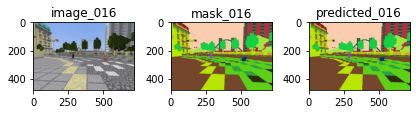

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
titles = ['image', 'mask', 'predicted']
types = ['video', 'rgb_mask', 'predicted']
w=480
h=720
fig=plt.figure()
columns = 3
rows = 1
file_num = 16
for i in range(1, columns*rows +1):
    name = '{0}'.format(str(file_num).zfill(3))
    img_name = join(DATASET_ROOT, f'{types[i-1]}450', name+'.png')
    img = mpimg.imread(img_name)
    ax = fig.add_subplot(rows, columns, i)
    fig.tight_layout()
    plt.imshow(img)
    ax.set_title(f'{titles[i-1]}_{name}')
plt.savefig(join(DATASET_ROOT,'016.png'))

In [ ]:
# img_name = join(DATASET_ROOT, f'{types[0]}450', '016.' + ('png'if 0<2 else'jpg'))
# print(img_name)
# img = mpimg.imread(img_name)
# plt.imshow(img, filename=f'{titles[0]}_016')

### MAKING VIDEOS

In [18]:
import cv2
import numpy as np
def make_video(image_dir, size):
  print(image_dir)
  img=[]
  for file_num in range(size):
      name = '{0}'.format(str(file_num+1).zfill(3))+'.png'
      img.append(cv2.imread(join(DATASET_ROOT, image_dir, name)))

  height,width,layers=img[1].shape

  video=cv2.VideoWriter(join(DATASET_ROOT,f'{image_dir}.avi'),cv2.VideoWriter_fourcc(*'DIVX'),30,(width,height))

  for i in range(size):
      video.write(img[i])

  video.release()


In [19]:
for t in types:
  make_video(t+'450', 450)

video450
rgb_mask450
predicted450


PLAYING THE VIDEOS SIMULTANEOUSLY

In [54]:
from PIL import Image
import torchvision.transforms.functional as f

# display 3 pictures (origin, groundtruth, mask) in a row
# store in /together in the shared drive
def make_together(types, size):
  white_column = np.zeros([480,10,3],dtype=np.uint8)
  white_column.fill(255)
  for i in range(size):
    name = '{0}'.format(str(i+1).zfill(3))+'.png'
    arrays = [cv2.cvtColor(cv2.imread(join(DATASET_ROOT, t+"450", name), 1),cv2.COLOR_BGR2RGB) for t in types]
    input = np.concatenate((arrays[0], white_column, arrays[1], white_column, arrays[2]), axis=1)
    data = Image.fromarray(input) 
    data.save(join(DATASET_ROOT,'together',name))
make_together(['video', 'rgb_mask', 'predicted'], 450)

In [55]:
make_video('together',450)

together
